<a href="https://colab.research.google.com/github/udita1903/Computer-Vision/blob/main/Image%20Classification%20/Horse_or_Human/Horses_Humans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Importing all the zip files


In [15]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-09-23 17:06:13--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip.1’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.08s   

2023-09-23 17:06:13 (138 MB/s) - ‘validation-horse-or-human.zip.1’ saved [11480187/11480187]

--2023-09-23 17:06:13--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

In [16]:
import zipfile

# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [17]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [18]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse29-9.png', 'horse13-9.png', 'horse47-3.png', 'horse32-7.png', 'horse44-7.png', 'horse15-7.png', 'horse15-5.png', 'horse09-7.png', 'horse44-2.png', 'horse27-6.png']
TRAIN SET HUMANS: ['human08-18.png', 'human03-10.png', 'human16-13.png', 'human16-22.png', 'human12-21.png', 'human04-01.png', 'human04-11.png', 'human16-15.png', 'human03-11.png', 'human05-08.png']
VAL SET HORSES: ['horse5-002.png', 'horse1-276.png', 'horse1-436.png', 'horse3-026.png', 'horse5-565.png', 'horse1-411.png', 'horse5-342.png', 'horse6-544.png', 'horse3-469.png', 'horse3-584.png']
VAL SET HUMANS: ['valhuman02-15.png', 'valhuman02-03.png', 'valhuman04-04.png', 'valhuman04-08.png', 'valhuman01-02.png', 'valhuman05-19.png', 'valhuman01-15.png', 'valhuman01-00.png', 'valhuman03-09.png', 'valhuman05-10.png']


In [19]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


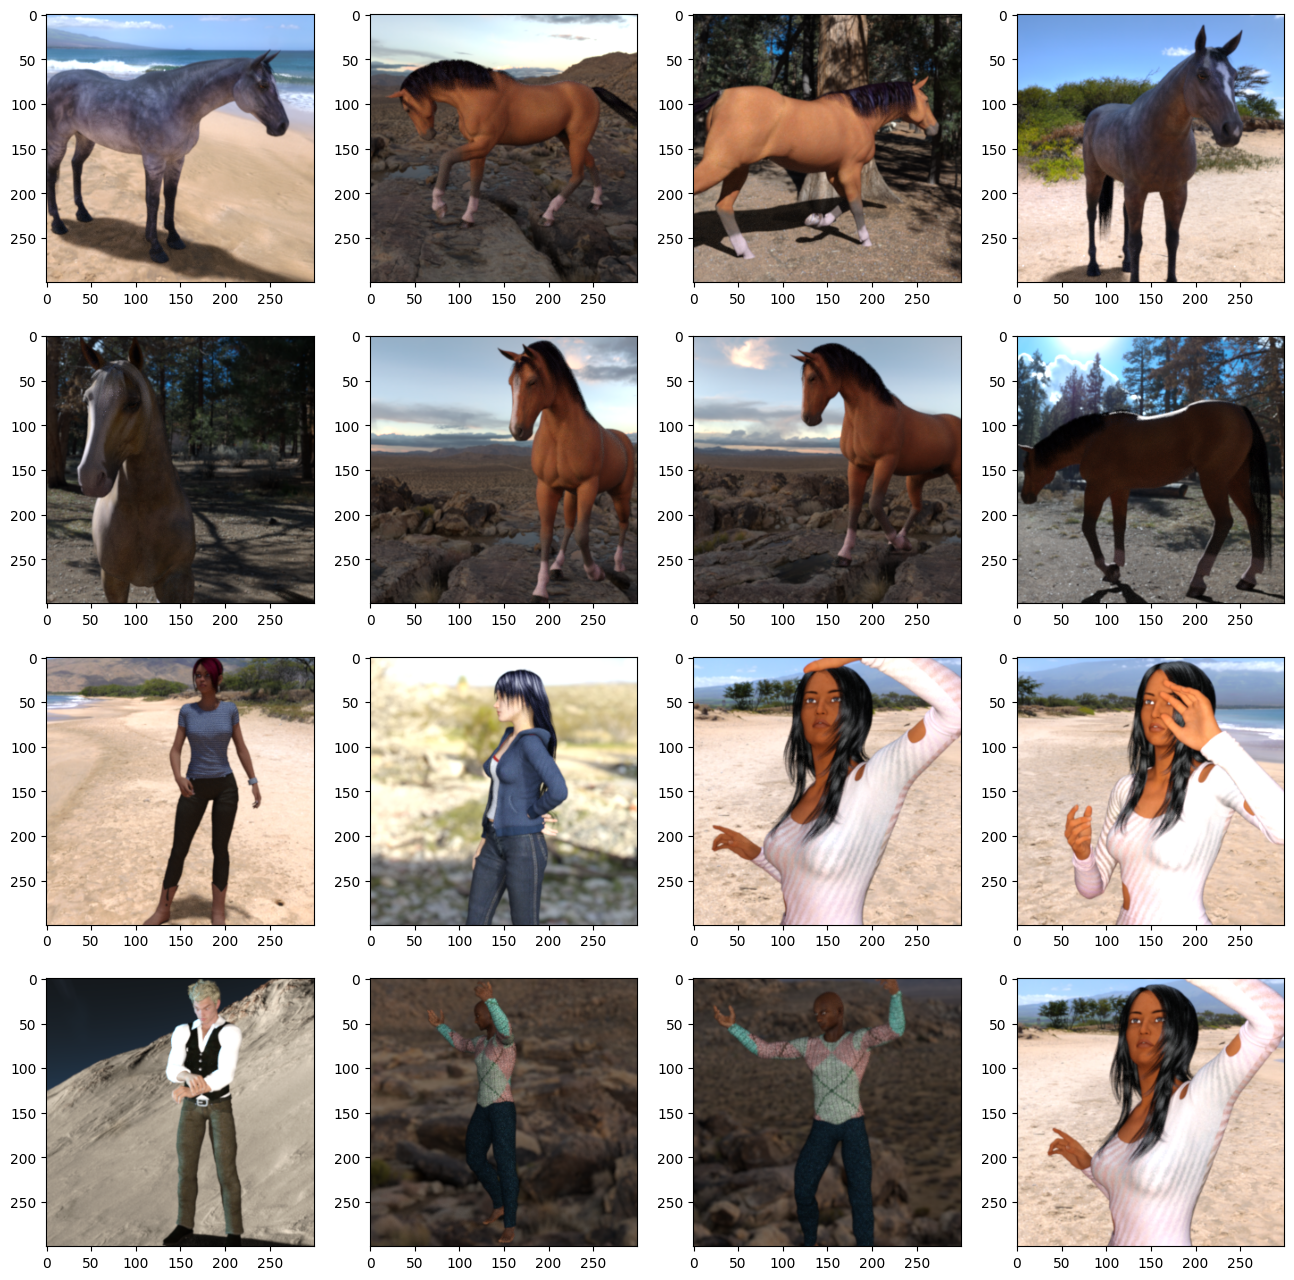

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg#for reading images you need this
%matplotlib inline

index=0
cols=4
rows=4
fig=plt.gcf()
fig.set_size_inches(16,16)

#retriving 8 horses and 8 human names
next_horse=[os.path.join(train_horse_dir,fname) for fname in train_horse_names[0:8]]
next_human=[os.path.join(train_human_dir,fname) for fname in train_human_names[0:8]]

#plotting those images obtained
for i,path in enumerate(next_horse+next_human):
  #creating subplot
  sp=plt.subplot(rows,cols,i+1)#starts at 1 so increment by 1

  #read the image at the path and show it
  image=mpimg.imread(path)
  plt.imshow(image)
plt.show()

In [21]:
#creating the model

model=tf.keras.Sequential([
                   tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                   tf.keras.layers.MaxPooling2D(2,2),

                   tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                   tf.keras.layers.MaxPooling2D(2,2),

                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                   tf.keras.layers.MaxPooling2D(2,2),

                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                   tf.keras.layers.MaxPooling2D(2,2),

                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                   tf.keras.layers.MaxPooling2D(2,2),


                   tf.keras.layers.Flatten(),
                   tf.keras.layers.Dense(512,activation='relu'),
                   tf.keras.layers.Dense(1,activation='sigmoid')

                   ])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 35, 35, 64)       

In [23]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics='accuracy')



In [25]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [27]:


training_generator=train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
 )
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [28]:
history = model.fit(
      training_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 11s 1s/step - loss: 0.9508 - accuracy: 0.4772 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 9s 1s/step - loss: 0.6892 - accuracy: 0.5195 - val_loss: 0.6832 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 10s 1s/step - loss: 0.6845 - accuracy: 0.5640 - val_loss: 0.7305 - val_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 0.6200 - accuracy: 0.6396 - val_loss: 0.7312 - val_accuracy: 0.5000
Epoch 5/15
8/8 [==============================] - 8s 1s/step - loss: 0.6840 - accuracy: 0.5605 - val_loss: 0.6267 - val_accuracy: 0.7773
Epoch 6/15
8/8 [==============================] - 9s 1s/step - loss: 0.6534 - accuracy: 0.5773 - val_loss: 0.6180 - val_accuracy: 0.5195
Epoch 7/15
8/8 [==============================] - 9s 1s/step - loss: 1.3768 - accuracy: 0.7141 - val_loss: 0.8287 - val_accuracy: 0.5117
Epoch 8/15
8/8 [=======================

In [29]:

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img,img_to_array


uploaded=files.upload()

for f in uploaded.keys():
  path='/content/'+f
  img=load_img(path,target_size=(300,300))
  x=img_to_array(img)
  x/=255

  x=np.expand_dims(x,axis=0)
  x=np.vstack([x])

  prediction=model.predict(x,batch_size=10)
  print(prediction[0])
  if(prediction[0]>0.5):
    print("HUMAN")
  else:
    print("HORSE")





